# Preparação do estado de bit-phase-flip

In [1]:
#from sympy import conjugate
from torch.autograd import Variable
import torch
from rsvg import rsvg
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np
from tools import *
import sys
import pickle
import os
import cmath
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere


In [2]:
n_qubits = 2
circuit, params = vqa_bpf(n_qubits)
target_vector, target_op = init_state_bpf(n_qubits, 0.5)
best_params, f = train(15, circuit, params, target_op)

0 0.5262135108715364
1 0.18297346749938123
2 0.051789324732884515
3 0.003972244867037602
4 0.0014342941744506419
5 0.0004906682162319572
6 0.005875322588010665
7 0.007775609909700927
8 0.01123527976804858
9 0.008532530478624461
10 0.007410331024719131
11 0.004950844126304784
12 0.004378463150100705
13 0.0015147777709718436
14 0.0008088023018595972
14 0.0008088023018595972


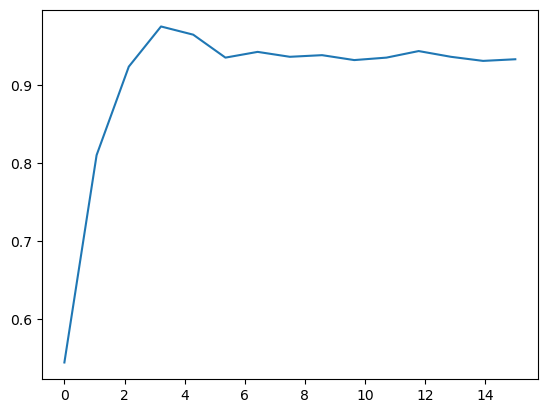

In [3]:
x = np.linspace(0,len(f),len(f))
plt.plot(x,f)
plt.show()

In [ ]:
#from qiskit_experiments.library import StateTomography
#from qiskit.providers.aer import AerSimulator

#beckend = Aer.get_backend('qasm_simulator')

In [13]:
import qiskit
from qiskit import *
nshots = 8192
IBMQ.save_account('7cc830e0cb005ce6de9caf9c402a1992c5d38d25af4237c19e72a4c58ce204481eb7a0d08b9929e5b5d3028f3146c38d2da8f2eb8db8f6f8b02a97eeb8fbc6de')
IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibmq_quito')
simulator = Aer.get_backend('qasm_simulator')
from qiskit.tools.monitor import job_monitor

configrc.store_credentials:WARNING:2023-02-15 22:47:19,824: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-02-15 22:47:20,077: Credentials are already in use. The existing account in the session will be replaced.


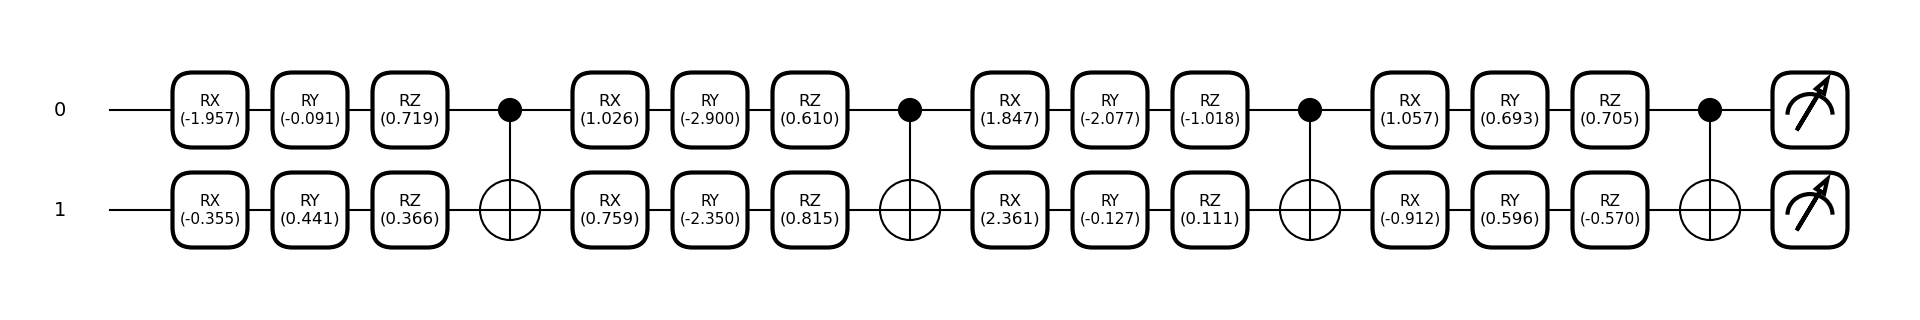

In [6]:
fig, ax = qml.draw_mpl(circuit, decimals=3)(best_params, target_op)
plt.show()

In [18]:
qr = QuantumRegister(2); qc = qiskit.QuantumCircuit(qr)
#print(params.detach().numpy()[0])
parametros = best_params.detach().numpy()
#print(len(parametros))
aux = 0
for i in range(0,24,6):
    #print(i)
    qc.rx(parametros[i],0)
    qc.ry(parametros[i+1],0)
    qc.rz(parametros[i+2],0)
    
    qc.rx(parametros[i+3],1)
    qc.ry(parametros[i+4],1)
    qc.rz(parametros[i+5],1)
    if i < 15:
        qc.cnot(0,1)
print(qc)

         ┌─────────────┐ ┌───────────────┐┌─────────────┐     ┌────────────┐»
q4511_0: ┤ Rx(-1.9571) ├─┤ Ry(-0.090905) ├┤ Rz(0.71886) ├──■──┤ Rx(1.0263) ├»
         ├─────────────┴┐└┬─────────────┬┘├─────────────┤┌─┴─┐├────────────┤»
q4511_1: ┤ Rx(-0.35504) ├─┤ Ry(0.44122) ├─┤ Rz(0.36551) ├┤ X ├┤ Rx(0.7591) ├»
         └──────────────┘ └─────────────┘ └─────────────┘└───┘└────────────┘»
«         ┌─────────────┐┌─────────────┐     ┌────────────┐┌─────────────┐ »
«q4511_0: ┤ Ry(-2.9005) ├┤ Rz(0.60974) ├──■──┤ Rx(1.8467) ├┤ Ry(-2.0768) ├─»
«         ├─────────────┤├─────────────┤┌─┴─┐├────────────┤├─────────────┴┐»
«q4511_1: ┤ Ry(-2.3496) ├┤ Rz(0.81469) ├┤ X ├┤ Rx(2.3606) ├┤ Ry(-0.12718) ├»
«         └─────────────┘└─────────────┘└───┘└────────────┘└──────────────┘»
«         ┌─────────────┐      ┌────────────┐ ┌─────────────┐┌─────────────┐ 
«q4511_0: ┤ Rz(-1.0179) ├──■───┤ Rx(1.0574) ├─┤ Ry(0.69296) ├┤ Rz(0.70493) ├─
«         ├─────────────┤┌─┴─┐┌┴────────────┴┐├─────────────┤├───────

In [ ]:
!pip install -U qiskit==0.36.2

In [17]:
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
qstc = state_tomography_circuits(qc, qr[0])
nshots = 8192
job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots)
qstf = StateTomographyFitter(job.result(), qstc)
rho = qstf.fit(method='lstsq')

rho

TypeError: unsupported operand type(s) for +=: 'QuantumCircuit' and 'QuantumCircuit'

In [4]:
theta = np.linspace(0,np.pi,3)
phi = np.linspace(0,np.pi/2,3)

n = 10
n_qubits = 2
fidelidades = []
pes = np.linspace(0,1,n)
for i in range(0, n):
    circuit, params = vqa(n_qubits)
    target_vector, target_op = init_state_bpf(n_qubits, pes[i])
    best_params, f = train(15, circuit, params, target_op)
    fidelidades.append(f[-1])
    with open('Fidelidades_nqb-2_BPF1.pkl', 'wb') as a:
        pickle.dump(fidelidades, a)

0 0.8019342422485352
1 0.5595741271972656
2 0.3142127990722656
3 0.1341104507446289
4 0.0710763931274414
5 0.038529396057128906
6 0.020328521728515625
7 0.011962890625
8 0.005364418029785156
9 0.005222320556640625
10 0.006257057189941406
11 0.004281044006347656
12 0.002780914306640625
13 0.004029273986816406
14 0.006890296936035156
14 0.006890296936035156
0 0.8566724702286012
1 0.4403098056526978
2 0.15728251109873542
3 0.0519254597707173
4 0.06638103638885748
5 0.053291235437159745
6 0.08723657758714508
7 0.06235286248592883
8 0.06235286248592883
9 0.038072063371966336
10 0.03924281638305612
11 0.025405915158662865
12 0.02263828808219481
13 0.018650248463363498
14 0.0145652710937793
14 0.0145652710937793
0 0.43186350771561444
1 0.15602020557962967
2 0.04137508943328821
3 0.035450685478142854
4 0.035450685478142854
5 0.02692332324286987
6 0.016071792572261625
7 0.024341158830895982
8 0.016587188842029876
9 0.014091548013954465
10 0.01093928104186512
11 0.013150230047260335
12 0.0138531

In [8]:
x = np.linspace(0,len(f),len(f))
plt.plot(x,f)
plt.show()

TypeError: object of type '_io.BufferedReader' has no len()

10


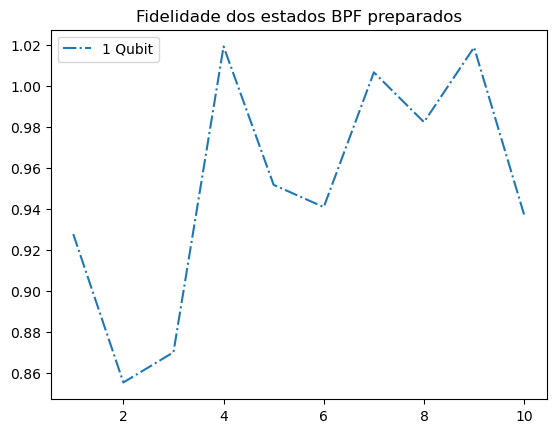

In [7]:
with open('Fidelidades_nqb-2_BPF1.pkl', 'rb') as f:
    y1 = pickle.load(f)
print(len(y1))
size = len(y1)
x = np.linspace(1, size, size)
plt.plot(x, y1[0:size], label='1 Qubit', linestyle="dashdot")
# plt.plot(x, y2[0:size], label='2 Qubit', linestyle=":")
# plt.plot(x, y3[0:size], label='3 Qubit', linestyle="--")
# plt.plot(x, y4[0:size], label='4 Qubit')
plt.title('Fidelidade dos estados BPF preparados')
#plt.ylim(0.95, 1.01)
plt.legend()
plt.show()

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


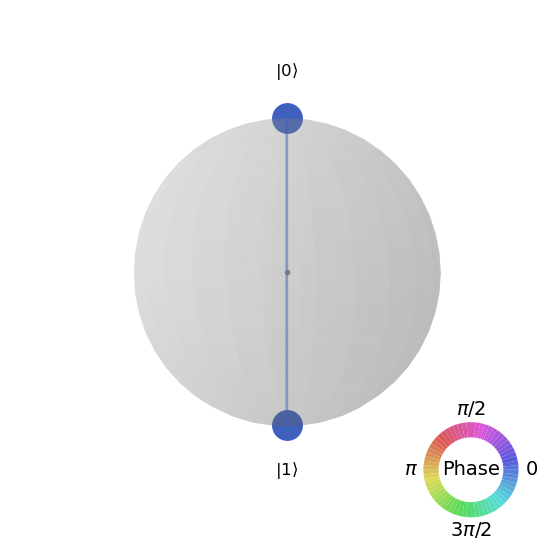

In [22]:
# TESTE COM O QISKIT
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
sv=Statevector.from_label('+')
print(sv)
plot_state_qsphere(sv)

[0.5      +0.j 0.8660254+0.j]


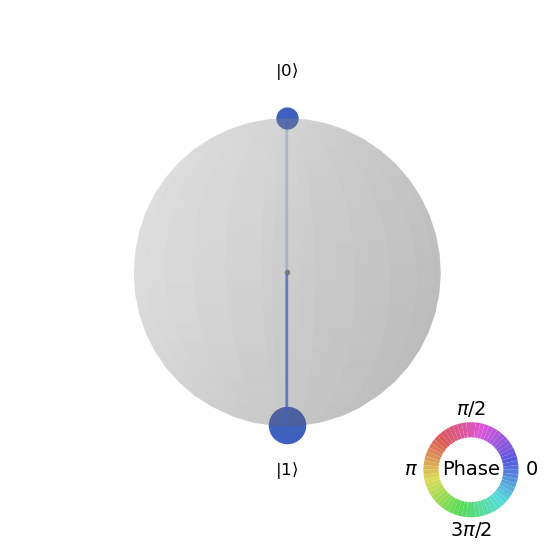

In [26]:
def general_state(theta, phi):
    state = np.zeros(2,dtype=complex)
    state[0] = np.cos(theta/2)
    state[1] = cmath.exp(1j*phi)*np.sin(theta/2)
    return state
print(general_state(np.pi/1.5,0))
sv=Statevector(general_state(np.pi/1.5,0))
plot_state_qsphere(sv)

In [9]:
import numpy as np
print(np.exp(np.float128(-10))) 
print(np.exp(np.float128(-10000)))

4.5399929762484851536e-05
1.1354838653147360985e-4343


In [5]:
def bpf(theta, phi, p):
    state = np.zeros(4,dtype=complex)
    state[0] = np.sqrt(1-p)*np.cos(theta/2)
    state[1] = cmath.exp(1j*phi)*np.sin(theta/2)
    state[2] = 1j*np.sqrt(p)*(-1)*cmath.exp(1j*phi)*np.sin(theta/2)
    state[3] = 1j*np.sqrt(p)*np.cos(theta/2)
    return state

print(bpf(np.pi/4,0,0.5))
#print(np.outer(bpf(np.pi/2,np.pi/4,0.5),bpf(np.pi/2,np.pi/4,0.5)))


[0.65328148+0.j         0.38268343+0.j         0.        -0.27059805j
 0.        +0.65328148j]


In [9]:
op = bpf(np.pi/1.5,0,0.5)
sv=Statevector(op)
plot_state_qsphere(sv)

QiskitError: 'Invalid input: not a vector or column-vector.'

NameError: name 'init_state_bpf' is not defined